# Surgical 🏨
- Fit an object oriented perceptron algorithm on the surgical dataset for classification

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from perceptron import Perceptron

In [2]:
df = pd.read_csv("Surgical-deepnet.csv")
X = df.drop('complication', axis=1).copy().values
Y = df['complication'].copy().values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((10976, 24), (3659, 24), (10976,), (3659,))

In [3]:
model = Perceptron(X.shape[1], learning_rate=0.001)
L_train, A_train, L_test, A_test = model.fit(X_train, Y_train, X_test, Y_test,  epochs=200)

- Plot accuracy in each epoch for train and test data

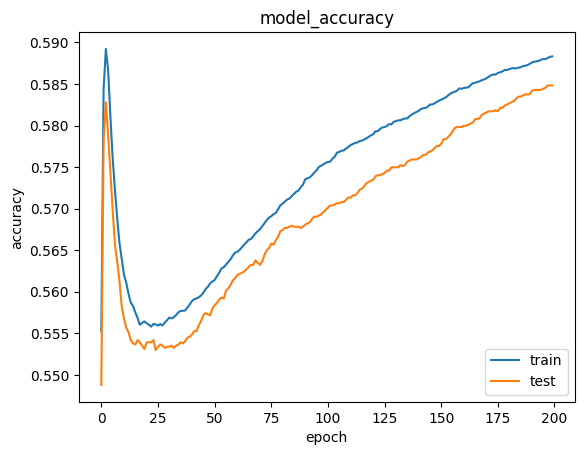

In [4]:
fig, (ax1) = plt.subplots(1)

ax1.plot(A_train)
ax1.plot(A_test)
ax1.set_title("model_accuracy")
ax1.legend(['train','test'])
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
plt.show()

- Plot loss in each epoch for train and test data

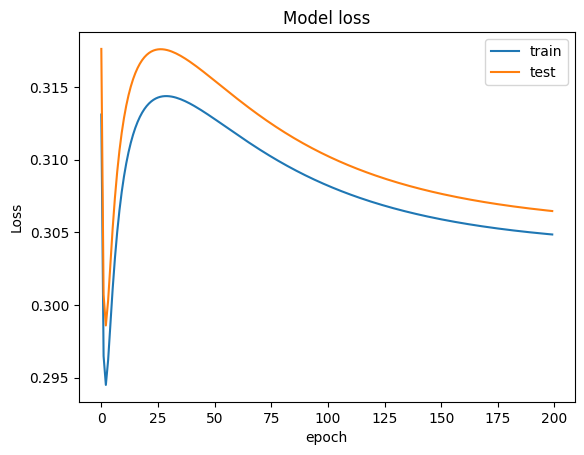

In [5]:
fig, (ax2) = plt.subplots(1)
ax2.plot(L_train)
ax2.plot(L_test)
ax2.set_title("Model loss")
ax2.legend(['train','test'])
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
plt.show()


- Calculate confusion matrix

In [6]:
model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
Y_pred = Y_pred > 0.5
confusion_matrix(Y_test, Y_pred)

array([[2143,  590],
       [ 315,  611]], dtype=int64)